In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

In [29]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [30]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [31]:

tr_df = train_df('/content/drive/MyDrive/Brain Tumor Classification/Merged_Dataset_1/Training')

In [32]:
tr_df

,Class Path,Class
0,/content/drive/MyDrive/Brain Tumor Classificat...,notumor
1,/content/drive/MyDrive/Brain Tumor Classificat...,notumor
2,/content/drive/MyDrive/Brain Tumor Classificat...,notumor
3,/content/drive/MyDrive/Brain Tumor Classificat...,notumor
4,/content/drive/MyDrive/Brain Tumor Classificat...,notumor
...,...,...
5707,/content/drive/MyDrive/Brain Tumor Classificat...,pituitary
5708,/content/drive/MyDrive/Brain Tumor Classificat...,pituitary
5709,/content/drive/MyDrive/Brain Tumor Classificat...,pituitary
5710,/content/drive/MyDrive/Brain Tumor Classificat...,pituitary


In [33]:
ts_df = test_df('/content/drive/MyDrive/Brain Tumor Classification/Merged_Dataset_1/Testing')

In [34]:
ts_df

,Class Path,Class
0,/content/drive/MyDrive/Brain Tumor Classificat...,notumor
1,/content/drive/MyDrive/Brain Tumor Classificat...,notumor
2,/content/drive/MyDrive/Brain Tumor Classificat...,notumor
3,/content/drive/MyDrive/Brain Tumor Classificat...,notumor
4,/content/drive/MyDrive/Brain Tumor Classificat...,notumor
...,...,...
1306,/content/drive/MyDrive/Brain Tumor Classificat...,pituitary
1307,/content/drive/MyDrive/Brain Tumor Classificat...,pituitary
1308,/content/drive/MyDrive/Brain Tumor Classificat...,pituitary
1309,/content/drive/MyDrive/Brain Tumor Classificat...,pituitary


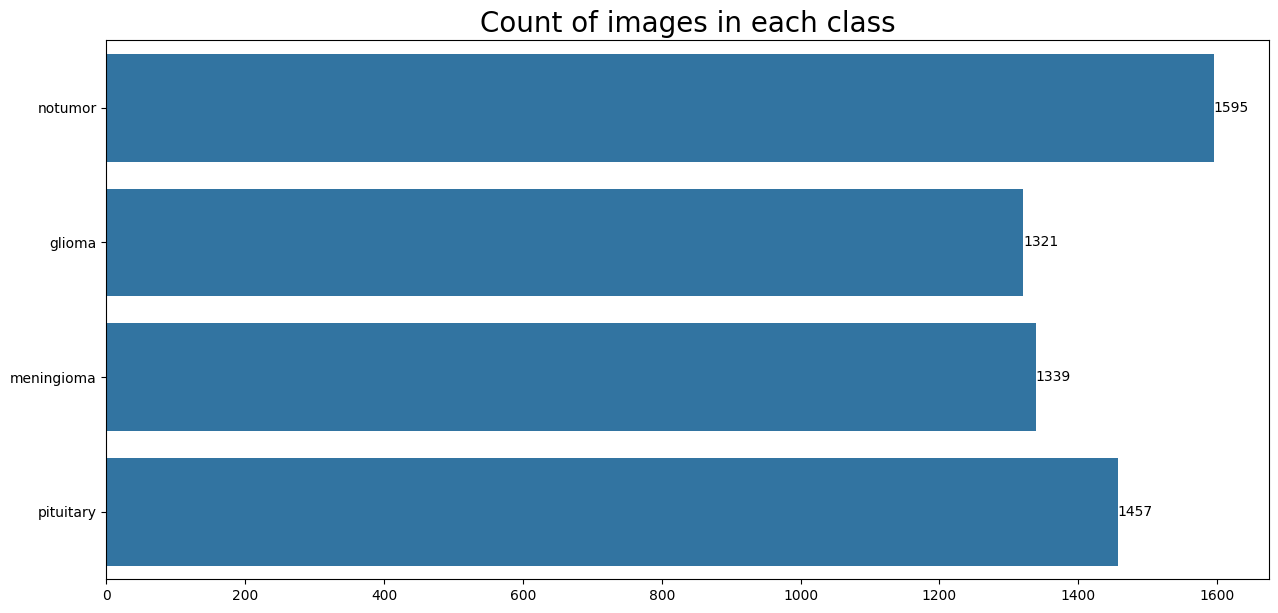

In [35]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

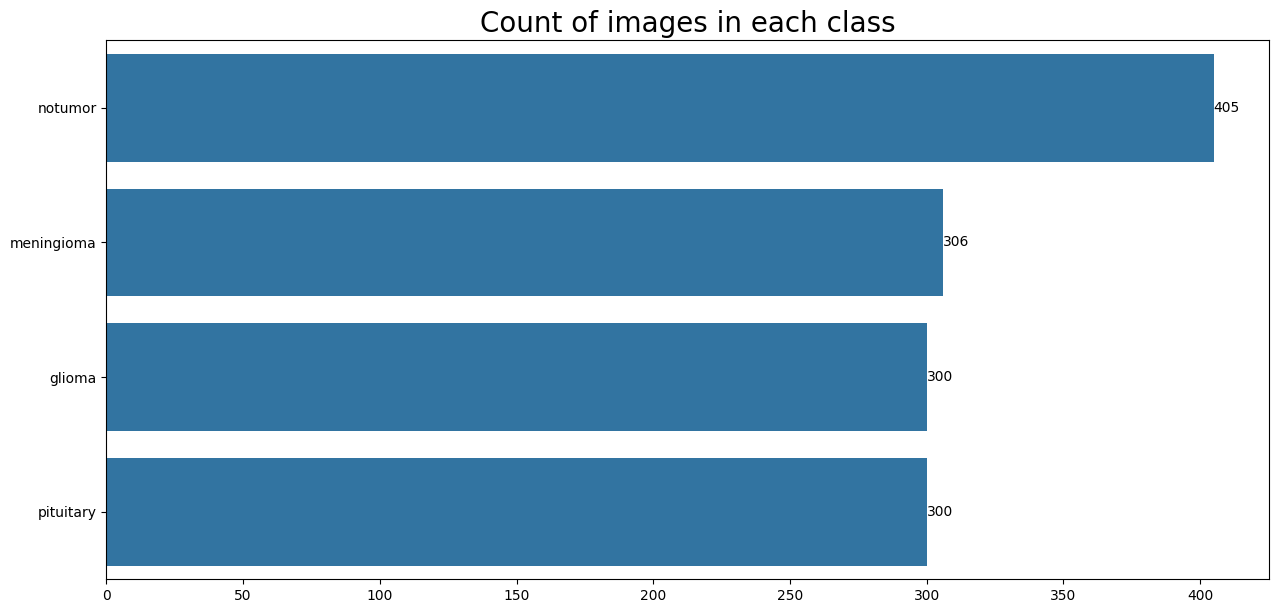

In [36]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df ['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

In [37]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [38]:
valid_df

,Class Path,Class
997,/content/drive/MyDrive/Brain Tumor Classificat...,glioma
423,/content/drive/MyDrive/Brain Tumor Classificat...,meningioma
1072,/content/drive/MyDrive/Brain Tumor Classificat...,pituitary
478,/content/drive/MyDrive/Brain Tumor Classificat...,meningioma
820,/content/drive/MyDrive/Brain Tumor Classificat...,glioma
...,...,...
770,/content/drive/MyDrive/Brain Tumor Classificat...,glioma
254,/content/drive/MyDrive/Brain Tumor Classificat...,notumor
984,/content/drive/MyDrive/Brain Tumor Classificat...,glioma
599,/content/drive/MyDrive/Brain Tumor Classificat...,meningioma


In [39]:
train_path = '/content/drive/MyDrive/Brain Tumor Classification/Merged_Dataset_1/Training'
test_path = '/content/drive/MyDrive/Brain Tumor Classification/Merged_Dataset_1/Testing'

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with only rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for training, validation, and testing
tr_gen = datagen.flow_from_dataframe(
    dataframe=tr_df,
    x_col='Class Path',  # Column containing image paths
    y_col='Class',      # Column containing labels
    target_size=(160, 160),  # Target image size
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    shuffle=True  # Shuffle training data
)

valid_gen = datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Class Path',
    y_col='Class',
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # No need to shuffle validation data
)

ts_gen = datagen.flow_from_dataframe(
    dataframe=ts_df,
    x_col='Class Path',
    y_col='Class',
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # No need to shuffle test data
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [41]:
total_train_images = tr_gen.samples
print(f"Total number of training images: {total_train_images}")

total_valid_images = valid_gen.samples
print(f"Total number of validation images: {total_valid_images}")

total_test_images = ts_gen.samples
print(f"Total number of test images: {total_test_images}")

Total number of training images: 5712
Total number of validation images: 655
Total number of test images: 656


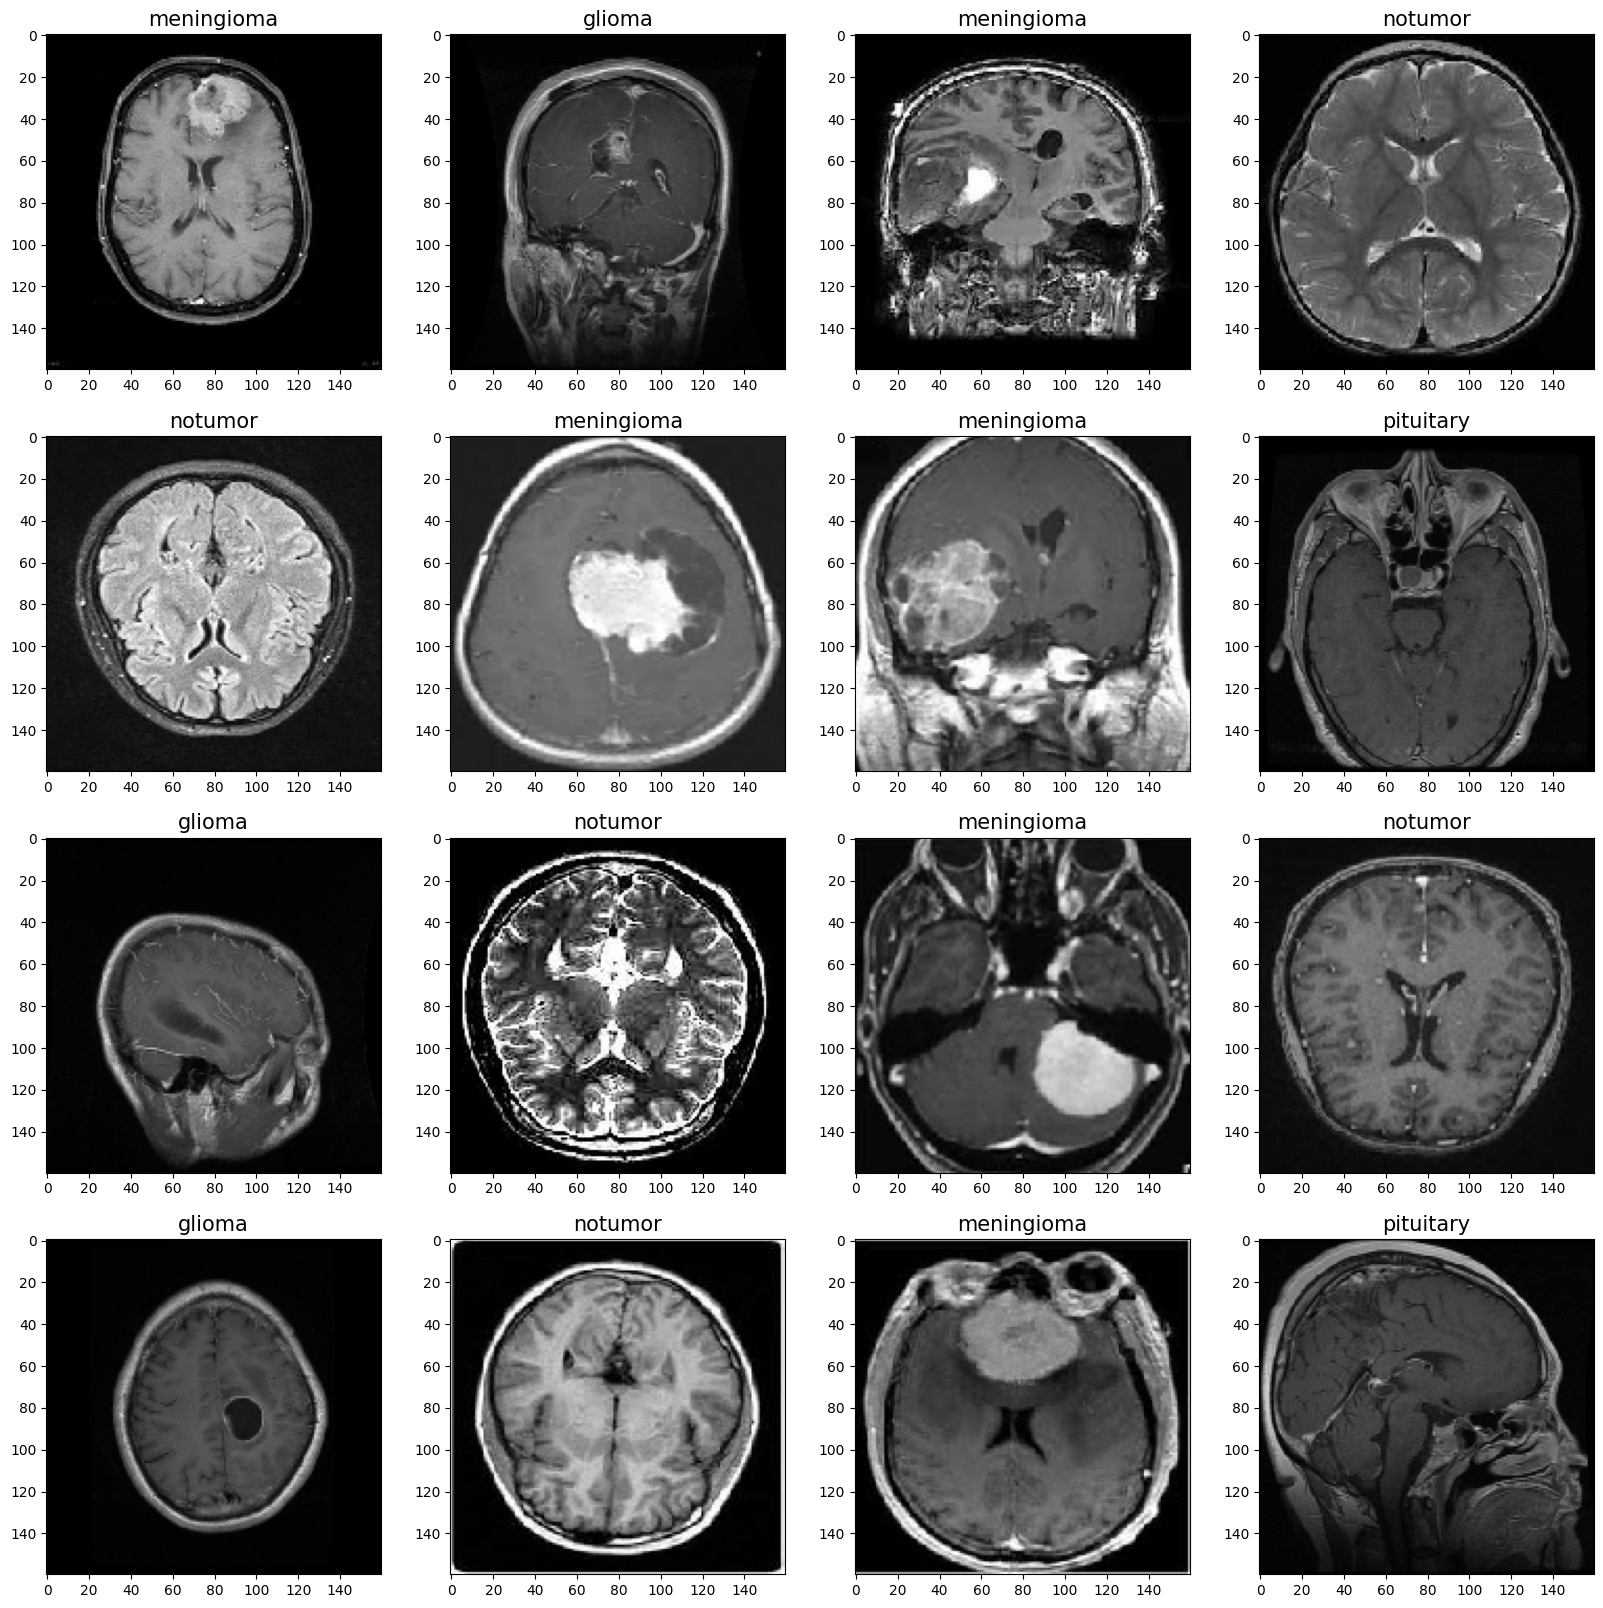

In [42]:
import matplotlib.pyplot as plt
import numpy as np

class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

# Limit the loop to the number of subplots available in the grid
for i, (image, label) in enumerate(zip(images, labels)):
    if i >= 16:  # Stop if we've reached the maximum number of subplots (4x4 grid)
        break
    plt.subplot(4, 4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

In [44]:
img_shape=(160,160,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

# for layer in base_model.layers:
#     layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

# Call the model with a sample input to define the output shapes
sample_input = tf.keras.Input(shape=img_shape)  # Create a sample input tensor
_ = model(sample_input)  # Call the model to infer shapes

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

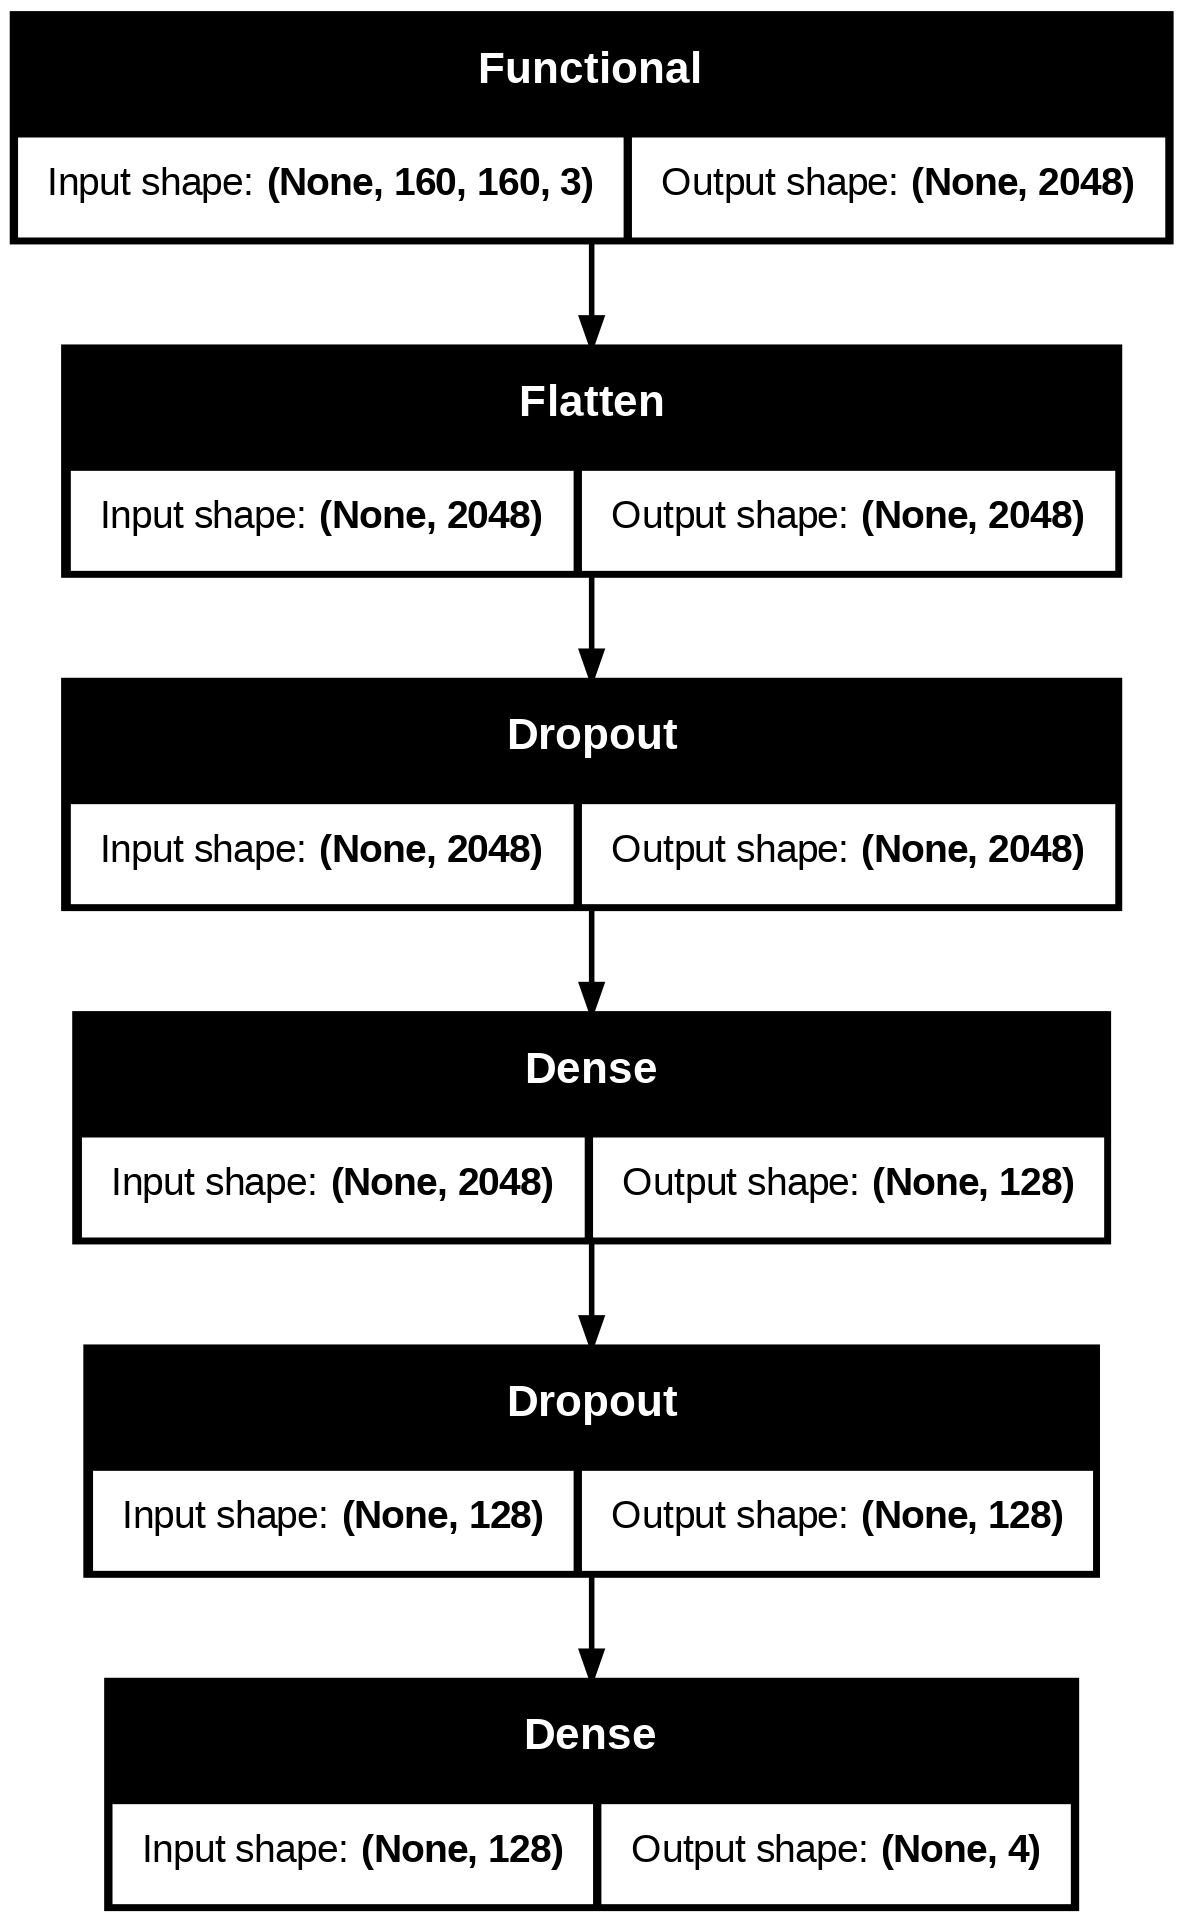

In [45]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [46]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the path to save the best model
checkpoint_path = "/content/drive/MyDrive/Brain Tumor Classification/Xception_checkpoint_1.keras"

# Set up early stopping and model checkpointing
early_stopping = EarlyStopping(
    monitor='val_loss',     # Monitor validation loss
    patience=5,             # Stop training after 5 epochs without improvement
    restore_best_weights=True # Restore weights of the best epoch
)

model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,  # Path to save the model file
    monitor='val_loss',        # Monitor validation loss
    save_best_only=True,       # Only save the model with the best val_loss
    verbose=1                  # Print updates when the model is saved
)

# Train the model with the callbacks
hist = model.fit(
    tr_gen,
    epochs=30,
    validation_data=valid_gen,
    shuffle=False,
    callbacks=[early_stopping, model_checkpoint]  # Add callbacks here
)


Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.8074 - loss: 0.5385 - precision_2: 0.8605 - recall_2: 0.7218
Epoch 1: val_loss improved from inf to 0.40209, saving model to /content/drive/MyDrive/Brain Tumor Classification/Xception_checkpoint_1.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.8079 - loss: 0.5373 - precision_2: 0.8608 - recall_2: 0.7225 - val_accuracy: 0.8580 - val_loss: 0.4021 - val_precision_2: 0.8850 - val_recall_2: 0.8458
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.9772 - loss: 0.0878 - precision_2: 0.9801 - recall_2: 0.9740
Epoch 2: val_loss improved from 0.40209 to 0.19953, saving model to /content/drive/MyDrive/Brain Tumor Classification/Xception_checkpoint_1.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 48s 264ms/step - accuracy: 0.9771 - loss: 0.0878 - precision_2: 0.9801 - recall_2: 0.9740 - val_accuracy: 0.9252 - val_loss: 0.1995 - val_precision_2: 0.9475 - val_recall_2: 0.9099
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━

In [47]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'precision_2', 'recall_2', 'val_accuracy', 'val_loss', 'val_precision_2', 'val_recall_2'])

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import tensorflow as tf

# Define the model architecture again
img_shape = (160, 160, 3)
base_model = Xception(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

# Compile the model to initialize it properly
model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

# Build the model by calling it on a sample input
model(tf.random.normal([1, *img_shape]))  # Pass a sample input to build the model

# Load the weights from the checkpoint
model.load_weights(checkpoint_path)


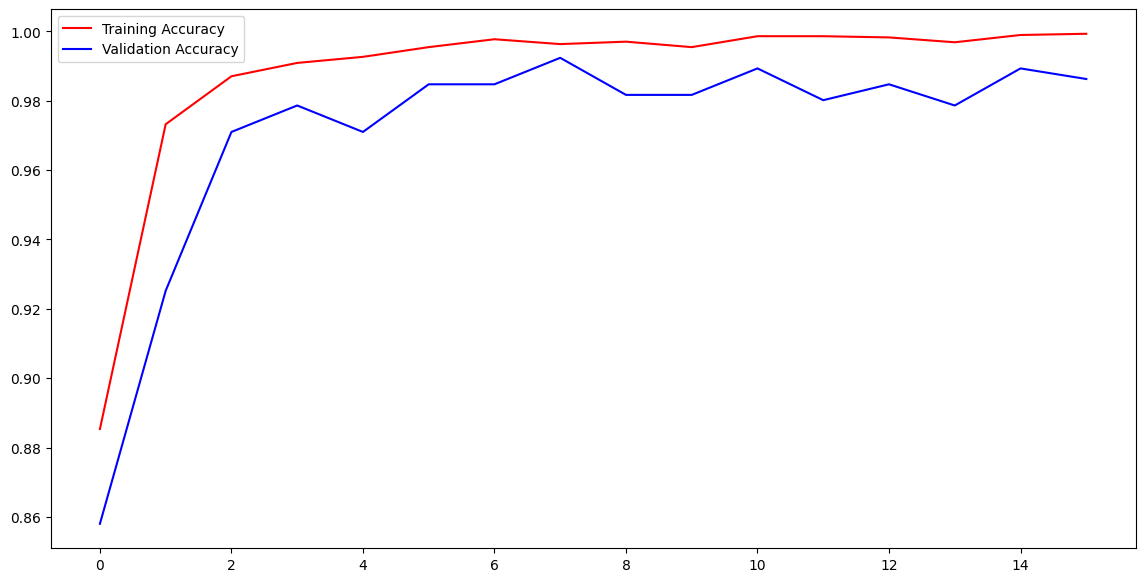

In [49]:
# plot history2
import matplotlib.pyplot as plt
import seaborn as sns
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

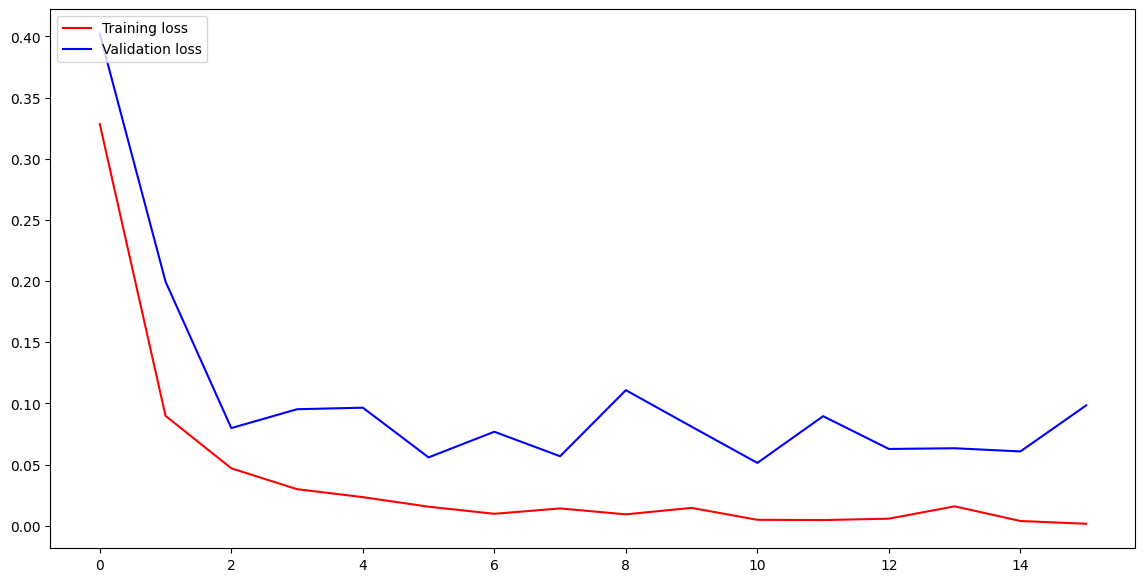

In [50]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

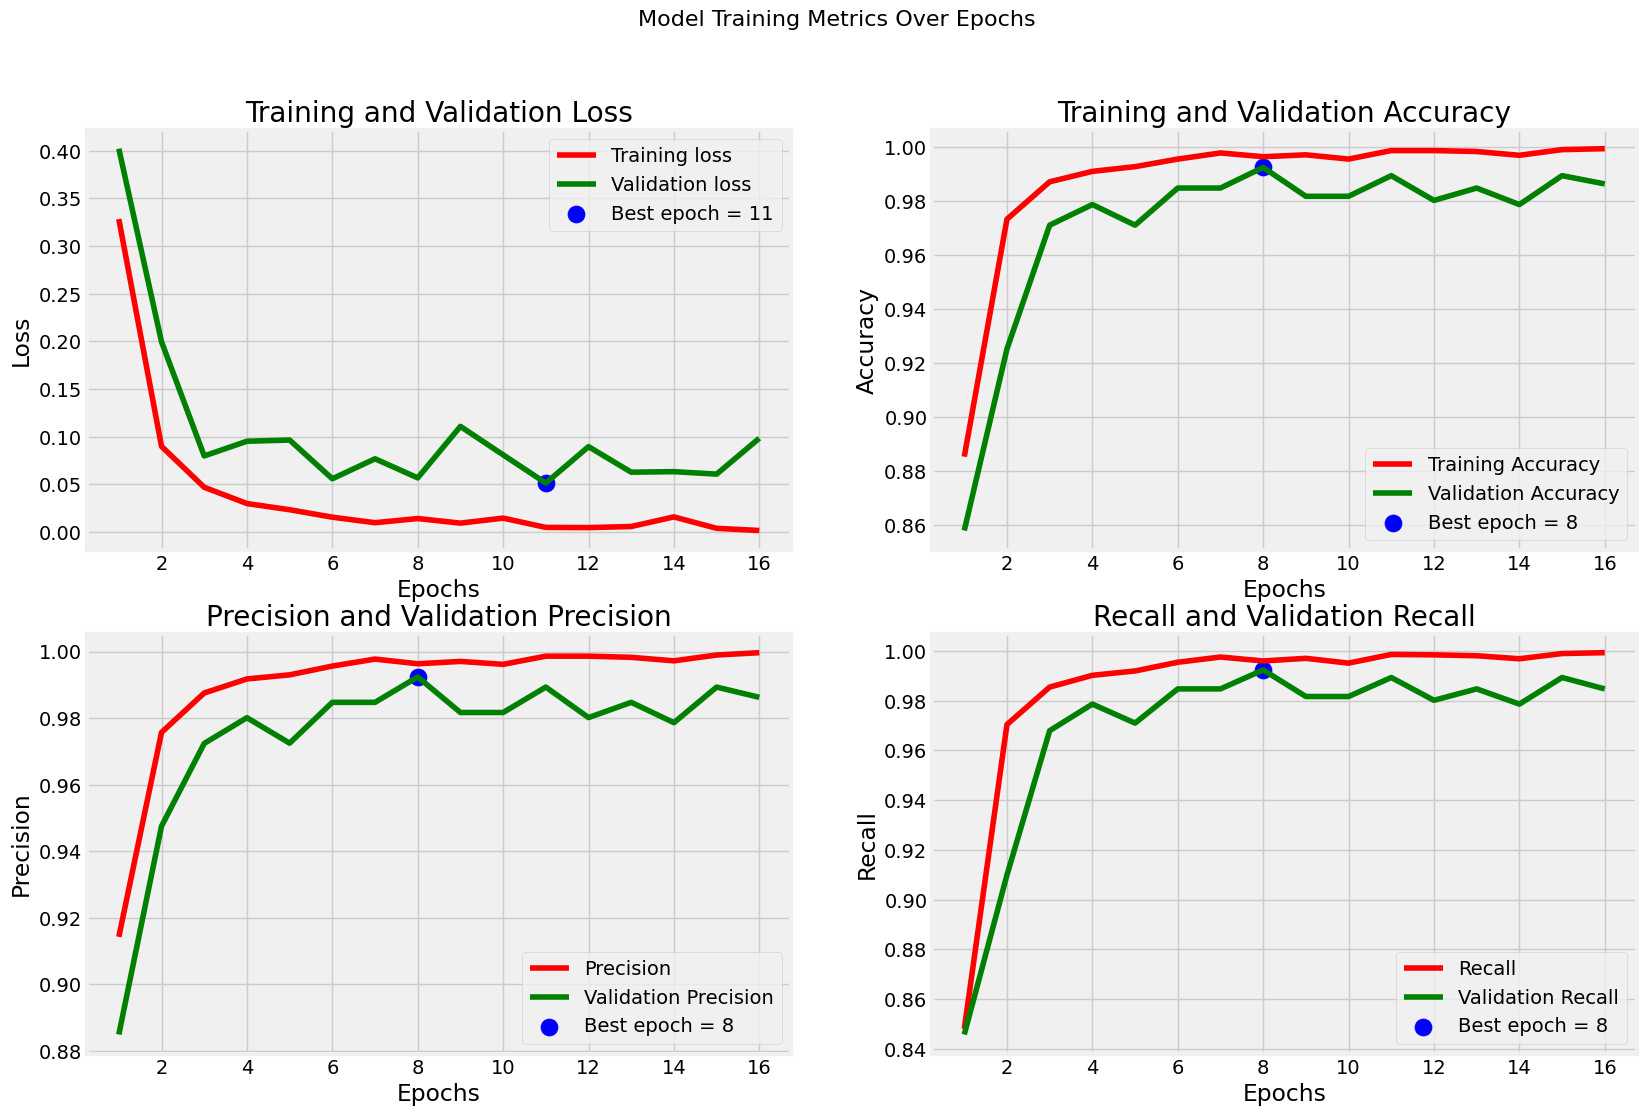

In [58]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision_2']
tr_recall = hist.history['recall_2']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision_2']
val_recall = hist.history['val_recall_2']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [52]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")


179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 168ms/step - accuracy: 0.9998 - loss: 0.0011 - precision_3: 0.9998 - recall_3: 0.9998
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.9889 - loss: 0.0724 - precision_3: 0.9889 - recall_3: 0.9889
21/21 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.9957 - loss: 0.0122 - precision_3: 0.9957 - recall_3: 0.9957
Train Loss: 0.0021
Train Accuracy: 99.95%
--------------------
Validation Loss: 0.0513
Validation Accuracy: 98.93%
--------------------
Test Loss: 0.0109
Test Accuracy: 99.54%


In [53]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 228ms/step


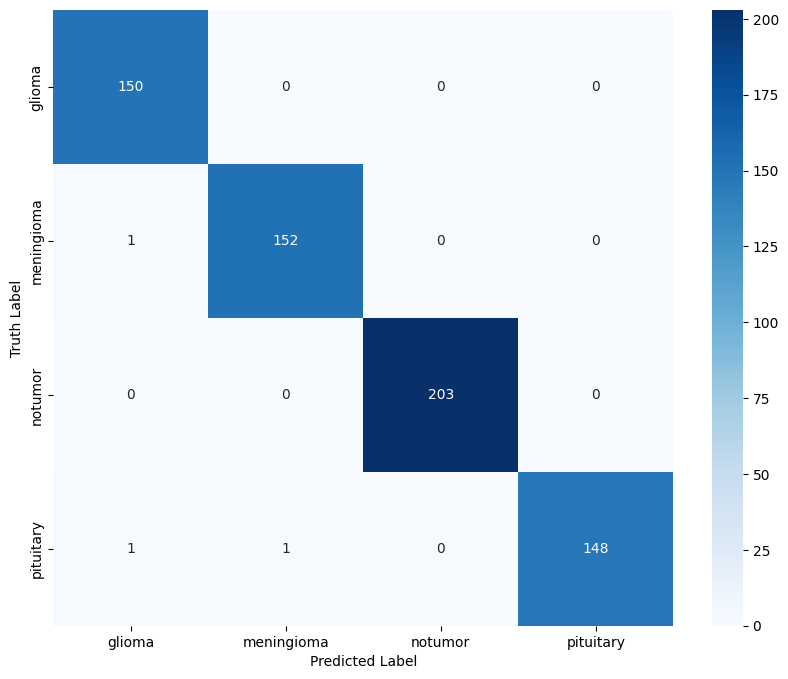

In [54]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [55]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       150
           1       0.99      0.99      0.99       153
           2       1.00      1.00      1.00       203
           3       1.00      0.99      0.99       150

    accuracy                           1.00       656
   macro avg       1.00      1.00      1.00       656
weighted avg       1.00      1.00      1.00       656

